In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [ ]:
#load data(sometimes need to use "/")
#df = pd.read_csv('D:/pythonData/python_demo_data/Titanic_demo_1.csv')
# Colab
df = pd.read_csv('D:/user/Desktop/深度學習導論與應用/期末報告/NVDA15-23Class.csv')
df

,Date,Y,Lag_1,Lag_2,Lag_3
0,2015/1/2,1,5.012500,5.092500,5.140000
1,2015/1/5,0,5.032500,5.012500,5.092500
2,2015/1/6,0,4.947500,5.032500,5.012500
3,2015/1/7,0,4.797500,4.947500,5.032500
4,2015/1/8,1,4.785000,4.797500,4.947500
...,...,...,...,...,...
2109,2023/5/19,0,316.779999,301.779999,292.130005
2110,2023/5/22,0,312.640015,316.779999,301.779999
2111,2023/5/23,0,311.760010,312.640015,316.779999
2112,2023/5/24,0,306.880005,311.760010,312.640015


,Date,Y,Lag_1,Lag_2,Lag_3
0,2015/1/2,1,5.012500,5.092500,5.140000
1,2015/1/5,0,5.032500,5.012500,5.092500
2,2015/1/6,0,4.947500,5.032500,5.012500
3,2015/1/7,0,4.797500,4.947500,5.032500
4,2015/1/8,1,4.785000,4.797500,4.947500
...,...,...,...,...,...
2109,2023/5/19,0,316.779999,301.779999,292.130005
2110,2023/5/22,0,312.640015,316.779999,301.779999
2111,2023/5/23,0,311.760010,312.640015,316.779999
2112,2023/5/24,0,306.880005,311.760010,312.640015


# 1. Quick overview to get a grasp of the data set

key function: pd.info(); pd.astype(); describe(); pd.value_counts()

In [ ]:
# 1.1 Easiest way to check data type and if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2114 non-null   object 
 1   Y       2114 non-null   int64  
 2   Lag_1   2114 non-null   float64
 3   Lag_2   2114 non-null   float64
 4   Lag_3   2114 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 82.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2114 non-null   object 
 1   Y       2114 non-null   int64  
 2   Lag_1   2114 non-null   float64
 3   Lag_2   2114 non-null   float64
 4   Lag_3   2114 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 82.7+ KB


In [ ]:
# 1.2 When using the describe function in default, pandas automatically selects the numerical columns
df.describe()

,Y,Lag_1,Lag_2,Lag_3
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,0.543992,87.300322,87.158275,87.015540
std,0.498179,81.329830,81.210909,81.089623
min,0.000000,4.785000,4.785000,4.785000
25%,0.000000,25.735626,25.706875,25.693749
50%,1.000000,55.145001,54.793751,54.543751
75%,1.000000,137.143753,137.136249,137.006874
max,1.000000,333.760010,333.760010,333.760010


,Y,Lag_1,Lag_2,Lag_3
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,0.543992,87.300322,87.158275,87.015540
std,0.498179,81.329830,81.210909,81.089623
min,0.000000,4.785000,4.785000,4.785000
25%,0.000000,25.735626,25.706875,25.693749
50%,1.000000,55.145001,54.793751,54.543751
75%,1.000000,137.143753,137.136249,137.006874
max,1.000000,333.760010,333.760010,333.760010


Note: Pclass is categorical data with dummies, so converting to correct data type is required

In [ ]:
# Change data type
df[['Y']]=df[['Y']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2114 non-null   object 
 1   Y       2114 non-null   object 
 2   Lag_1   2114 non-null   float64
 3   Lag_2   2114 non-null   float64
 4   Lag_3   2114 non-null   float64
dtypes: float64(3), object(2)
memory usage: 82.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2114 non-null   object 
 1   Y       2114 non-null   object 
 2   Lag_1   2114 non-null   float64
 3   Lag_2   2114 non-null   float64
 4   Lag_3   2114 non-null   float64
dtypes: float64(3), object(2)
memory usage: 82.7+ KB


In [ ]:
# 1.2 Show the correct descriptive statistics
df.describe()

,Lag_1,Lag_2,Lag_3
count,2114.000000,2114.000000,2114.000000
mean,87.300322,87.158275,87.015540
std,81.329830,81.210909,81.089623
min,4.785000,4.785000,4.785000
25%,25.735626,25.706875,25.693749
50%,55.145001,54.793751,54.543751
75%,137.143753,137.136249,137.006874
max,333.760010,333.760010,333.760010


,Lag_1,Lag_2,Lag_3
count,2114.000000,2114.000000,2114.000000
mean,87.300322,87.158275,87.015540
std,81.329830,81.210909,81.089623
min,4.785000,4.785000,4.785000
25%,25.735626,25.706875,25.693749
50%,55.145001,54.793751,54.543751
75%,137.143753,137.136249,137.006874
max,333.760010,333.760010,333.760010


In [ ]:
# 1.3 Add include='all' to select all columns
df.describe(include='all')

,Date,Y,Lag_1,Lag_2,Lag_3
count,2114,2114,2114.000000,2114.000000,2114.000000
unique,2114,2,NaN,NaN,NaN
top,2015/1/2,1,NaN,NaN,NaN
freq,1,1150,NaN,NaN,NaN
mean,NaN,NaN,87.300322,87.158275,87.015540
std,NaN,NaN,81.329830,81.210909,81.089623
min,NaN,NaN,4.785000,4.785000,4.785000
25%,NaN,NaN,25.735626,25.706875,25.693749
50%,NaN,NaN,55.145001,54.793751,54.543751
75%,NaN,NaN,137.143753,137.136249,137.006874


,Date,Y,Lag_1,Lag_2,Lag_3
count,2114,2114,2114.000000,2114.000000,2114.000000
unique,2114,2,NaN,NaN,NaN
top,2015/1/2,1,NaN,NaN,NaN
freq,1,1150,NaN,NaN,NaN
mean,NaN,NaN,87.300322,87.158275,87.015540
std,NaN,NaN,81.329830,81.210909,81.089623
min,NaN,NaN,4.785000,4.785000,4.785000
25%,NaN,NaN,25.735626,25.706875,25.693749
50%,NaN,NaN,55.145001,54.793751,54.543751
75%,NaN,NaN,137.143753,137.136249,137.006874


# 2. Data preprocessing

key function: pd.dropma() unique(); LabelEncoder(); pd.get_dummies

In [ ]:
# 2.1 Deal with missing value by dropping it
new_df=df.drop(['Date'],axis=1)
new_df

,Y,Lag_1,Lag_2,Lag_3
0,1,5.012500,5.092500,5.140000
1,0,5.032500,5.012500,5.092500
2,0,4.947500,5.032500,5.012500
3,0,4.797500,4.947500,5.032500
4,1,4.785000,4.797500,4.947500
...,...,...,...,...
2109,0,316.779999,301.779999,292.130005
2110,0,312.640015,316.779999,301.779999
2111,0,311.760010,312.640015,316.779999
2112,0,306.880005,311.760010,312.640015


,Y,Lag_1,Lag_2,Lag_3
0,1,5.012500,5.092500,5.140000
1,0,5.032500,5.012500,5.092500
2,0,4.947500,5.032500,5.012500
3,0,4.797500,4.947500,5.032500
4,1,4.785000,4.797500,4.947500
...,...,...,...,...
2109,0,316.779999,301.779999,292.130005
2110,0,312.640015,316.779999,301.779999
2111,0,311.760010,312.640015,316.779999
2112,0,306.880005,311.760010,312.640015


Note: get_dummies function generates the onehotencode style dummies

# Addition tips for data preprocessing

Sometimes deleting all missing value is not the only optimal option during data preprocessing, so this section provides two additional tips for dealing with missing value. 1. Find the specific data point in a column  2. Fill the missing value

# 3. Data scaling with minimax technique

Key function: MinMaxScaler()

In [ ]:
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['Y','Lag_1','Lag_2','Lag_3']
scaled_data.head()

,Y,Lag_1,Lag_2,Lag_3
0,1.0,0.000692,0.000935,0.001079
1,0.0,0.000752,0.000692,0.000935
2,0.0,0.000494,0.000752,0.000692
3,0.0,0.000038,0.000494,0.000752
4,1.0,0.000000,0.000038,0.000494


,Y,Lag_1,Lag_2,Lag_3
0,1.0,0.000692,0.000935,0.001079
1,0.0,0.000752,0.000692,0.000935
2,0.0,0.000494,0.000752,0.000692
3,0.0,0.000038,0.000494,0.000752
4,1.0,0.000000,0.000038,0.000494


# 4. Set dependent variable(Y or target) & independent variable(X)

In [ ]:
# Qucik recap
new_df.head()

,Y,Lag_1,Lag_2,Lag_3
0,1,5.0125,5.0925,5.1400
1,0,5.0325,5.0125,5.0925
2,0,4.9475,5.0325,5.0125
3,0,4.7975,4.9475,5.0325
4,1,4.7850,4.7975,4.9475


,Y,Lag_1,Lag_2,Lag_3
0,1,5.0125,5.0925,5.1400
1,0,5.0325,5.0125,5.0925
2,0,4.9475,5.0325,5.0125
3,0,4.7975,4.9475,5.0325
4,1,4.7850,4.7975,4.9475


Note: Survived is the target variable(Y), after onehotencoding, survived has divided into two columns; the model only need one target variable, since the target of this demo is binary, so either choosing 'survived_no' or 'survived_yes' will have the same outcome. Thus this demo chooses 'suvived_yes' as the target, because 'yes' is usually labeled with 1.

In [ ]:
#set x (make prediction) with minimax
x=scaled_data.drop(['Y'],axis=1).copy()

#set y (want to predict)
y=scaled_data['Y'].copy()
y=y.astype(int)
y

0       1
1       0
2       0
3       0
4       1
       ..
2109    0
2110    0
2111    0
2112    0
2113    1
Name: Y, Length: 2114, dtype: int32

0       1
1       0
2       0
3       0
4       1
       ..
2109    0
2110    0
2111    0
2112    0
2113    1
Name: Y, Length: 2114, dtype: int32

Note: Transforming target to integer datatype is optional

# 5. Spilt the data into train & test set

key function: train_test_split()

key parameters for train_test_spilt(): test_size; random_state

In [ ]:
#Rolling window 切資料
x_train1 = x[0:422]
x_validation1 = x[422:844]
y_train1 = y[0:422]
y_validation1 = y[422:844]

x_train2 = x[422:844]
x_validation2 = x[844:1266]
y_train2 = y[422:844]
y_validation2 = y[844:1266]

x_train3 = x[844:1266]
x_validation3 = x[1266:1688]
y_train3 = y[844:1266]
y_validation3 = y[1266:1688]


# 6. Creating Net

In [ ]:
# Quick recap: Total of 12 features in the data set
x.head()

,Lag_1,Lag_2,Lag_3
0,0.000692,0.000935,0.001079
1,0.000752,0.000692,0.000935
2,0.000494,0.000752,0.000692
3,0.000038,0.000494,0.000752
4,0.000000,0.000038,0.000494


,Lag_1,Lag_2,Lag_3
0,0.000692,0.000935,0.001079
1,0.000752,0.000692,0.000935
2,0.000494,0.000752,0.000692
3,0.000038,0.000494,0.000752
4,0.000000,0.000038,0.000494


In [ ]:
# Tips: Using shape to call the amount of features in the data set
input_features=x.shape[1]
print('Amount of features:',input_features)

Amount of features: 3
Amount of features: 3


# Sequential style coding for creating net

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

clear.clear_session()
def create_model(learning_rate=0.01, Droprate1=0.002, optimizer='Adam'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(x_train1.shape[1], 1)),
        tf.keras.layers.Dropout(rate=Droprate1),
        tf.keras.layers.LSTM(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=2)

param_grid = [{
    'optimizer': ['Adam', 'SGD', 'RMSprop'],
    'Droprate1': [0, 0.2, 0.3, 0.4],
    'learning_rate': [0.01, 0.001, 0.00001]
}]
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='accuracy')
grid_result1 = grid.fit(x_train1, y_train1, validation_data=(x_validation1, y_validation1))

C:\Users\user\AppData\Local\Temp\ipykernel_23408\2009306736.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=2)
C:\Users\user\AppData\Local\Temp\ipykernel_23408\2009306736.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=2)


Epoch 1/150
Epoch 1/150
14/14 - 2s - loss: 0.6933 - accuracy: 0.4953 - val_loss: 0.6929 - val_accuracy: 0.5521 - 2s/epoch - 137ms/step
14/14 - 2s - loss: 0.6933 - accuracy: 0.4953 - val_loss: 0.6929 - val_accuracy: 0.5521 - 2s/epoch - 137ms/step
Epoch 2/150
Epoch 2/150
14/14 - 0s - loss: 0.6927 - accuracy: 0.5616 - val_loss: 0.6925 - val_accuracy: 0.5521 - 62ms/epoch - 4ms/step
14/14 - 0s - loss: 0.6927 - accuracy: 0.5616 - val_loss: 0.6925 - val_accuracy: 0.5521 - 62ms/epoch - 4ms/step
Epoch 3/150
Epoch 3/150
14/14 - 0s - loss: 0.6922 - accuracy: 0.5616 - val_loss: 0.6921 - val_accuracy: 0.5521 - 61ms/epoch - 4ms/step
14/14 - 0s - loss: 0.6922 - accuracy: 0.5616 - val_loss: 0.6921 - val_accuracy: 0.5521 - 61ms/epoch - 4ms/step
Epoch 4/150
Epoch 4/150
14/14 - 0s - loss: 0.6918 - accuracy: 0.5616 - val_loss: 0.6919 - val_accuracy: 0.5521 - 58ms/epoch - 4ms/step
14/14 - 0s - loss: 0.6918 - accuracy: 0.5616 - val_loss: 0.6919 - val_accuracy: 0.5521 - 58ms/epoch - 4ms/step
Epoch 5/150
Epoc

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

clear.clear_session()
def create_model(learning_rate=0.01, Droprate1=0.002, optimizer='Adam'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(x_train1.shape[1], 1)),
        tf.keras.layers.Dropout(rate=Droprate1),
        tf.keras.layers.LSTM(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=2)

param_grid = [{
    'optimizer': ['Adam', 'SGD', 'RMSprop'],
    'Droprate1': [0, 0.2, 0.3, 0.4],
    'learning_rate': [0.01, 0.001, 0.00001]
}]
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='accuracy')
grid_result2 = grid.fit(x_train2, y_train2, validation_data=(x_validation2, y_validation2))

C:\Users\user\AppData\Local\Temp\ipykernel_23408\2195490907.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=2)
C:\Users\user\AppData\Local\Temp\ipykernel_23408\2195490907.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=2)


Epoch 1/150
Epoch 1/150
14/14 - 1s - loss: 0.6926 - accuracy: 0.5521 - val_loss: 0.6925 - val_accuracy: 0.5284 - 1s/epoch - 107ms/step
14/14 - 1s - loss: 0.6926 - accuracy: 0.5521 - val_loss: 0.6925 - val_accuracy: 0.5284 - 1s/epoch - 107ms/step
Epoch 2/150
Epoch 2/150
14/14 - 0s - loss: 0.6919 - accuracy: 0.5521 - val_loss: 0.6923 - val_accuracy: 0.5284 - 77ms/epoch - 6ms/step
14/14 - 0s - loss: 0.6919 - accuracy: 0.5521 - val_loss: 0.6923 - val_accuracy: 0.5284 - 77ms/epoch - 6ms/step
Epoch 3/150
Epoch 3/150
14/14 - 0s - loss: 0.6912 - accuracy: 0.5521 - val_loss: 0.6920 - val_accuracy: 0.5284 - 77ms/epoch - 6ms/step
14/14 - 0s - loss: 0.6912 - accuracy: 0.5521 - val_loss: 0.6920 - val_accuracy: 0.5284 - 77ms/epoch - 6ms/step
Epoch 4/150
Epoch 4/150
14/14 - 0s - loss: 0.6902 - accuracy: 0.5521 - val_loss: 0.6917 - val_accuracy: 0.5284 - 79ms/epoch - 6ms/step
14/14 - 0s - loss: 0.6902 - accuracy: 0.5521 - val_loss: 0.6917 - val_accuracy: 0.5284 - 79ms/epoch - 6ms/step
Epoch 5/150
Epoc

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

clear.clear_session()
def create_model(learning_rate=0.01, Droprate1=0.002, Droprate2=0.03, optimizer='Adam'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(x_train1.shape[1], 1)),
        tf.keras.layers.Dropout(rate=Droprate1),
        tf.keras.layers.LSTM(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=2)

param_grid = [{
    'optimizer': ['Adam', 'SGD', 'RMSprop'],
    'Droprate1': [0, 0.2, 0.3, 0.4],
    'learning_rate': [0.01, 0.001, 0.00001]
}]
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='accuracy')
grid_result3 = grid.fit(x_train3, y_train3, validation_data=(x_validation3, y_validation3))

C:\Users\user\AppData\Local\Temp\ipykernel_23408\2820974660.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=2)
C:\Users\user\AppData\Local\Temp\ipykernel_23408\2820974660.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32, verbose=2)


Epoch 1/150
Epoch 1/150
14/14 - 1s - loss: 0.6930 - accuracy: 0.5284 - val_loss: 0.6924 - val_accuracy: 0.5616 - 1s/epoch - 104ms/step
14/14 - 1s - loss: 0.6930 - accuracy: 0.5284 - val_loss: 0.6924 - val_accuracy: 0.5616 - 1s/epoch - 104ms/step
Epoch 2/150
Epoch 2/150
14/14 - 0s - loss: 0.6929 - accuracy: 0.5284 - val_loss: 0.6919 - val_accuracy: 0.5616 - 63ms/epoch - 4ms/step
14/14 - 0s - loss: 0.6929 - accuracy: 0.5284 - val_loss: 0.6919 - val_accuracy: 0.5616 - 63ms/epoch - 4ms/step
Epoch 3/150
Epoch 3/150
14/14 - 0s - loss: 0.6927 - accuracy: 0.5284 - val_loss: 0.6917 - val_accuracy: 0.5616 - 58ms/epoch - 4ms/step
14/14 - 0s - loss: 0.6927 - accuracy: 0.5284 - val_loss: 0.6917 - val_accuracy: 0.5616 - 58ms/epoch - 4ms/step
Epoch 4/150
Epoch 4/150
14/14 - 0s - loss: 0.6927 - accuracy: 0.5284 - val_loss: 0.6916 - val_accuracy: 0.5616 - 64ms/epoch - 5ms/step
14/14 - 0s - loss: 0.6927 - accuracy: 0.5284 - val_loss: 0.6916 - val_accuracy: 0.5616 - 64ms/epoch - 5ms/step
Epoch 5/150
Epoc

In [ ]:
print(grid_result1.best_params_)
print(grid_result1.best_score_)
print(grid_result2.best_params_)
print(grid_result2.best_score_)
print(grid_result3.best_params_)
print(grid_result3.best_score_)

{'Droprate1': 0.002, 'learning_rate': 0.01, 'optimizer': 'Adam'}
0.5618487394957984
{'Droprate1': 0.002, 'learning_rate': 0.01, 'optimizer': 'Adam'}
0.5522128851540616
{'Droprate1': 0.002, 'learning_rate': 0.01, 'optimizer': 'Adamax'}
0.5285994397759104
{'Droprate1': 0.002, 'learning_rate': 0.01, 'optimizer': 'Adam'}
0.5618487394957984
{'Droprate1': 0.002, 'learning_rate': 0.01, 'optimizer': 'Adam'}
0.5522128851540616
{'Droprate1': 0.002, 'learning_rate': 0.01, 'optimizer': 'Adamax'}
0.5285994397759104


In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(x_train1.shape[1], 1)))

model.add(Dropout(rate=0.2))

model.add(LSTM(units=32, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# 6.6 Compile the defined Net
opt=Adam(learning_rate=0.01)
#opt=Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model
model.summary()

Model: "sequential"
Model: "sequential"
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 3, 64)             0         
 lstm (LSTM)                 (None, 3, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 3, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
                                                                 
 lstm_1 (LSTM)               (None, 

Note: Remember to clear the session or else some of the left neurans may cause trouble while fitting

# 7. Fit the model

# Note: The validation set should be split manually

In [ ]:

# 7.1 Store in the history for more useful information
history=model.fit(x_train1, y_train1, epochs=150, batch_size=64,verbose=1,validation_data=(x_validation1, y_validation1))

Epoch 1/150
Epoch 1/150
7/7 [==============================] - 2s 75ms/step - loss: 0.6924 - accuracy: 0.4905 - val_loss: 0.6896 - val_accuracy: 0.5521
Epoch 2/150
Epoch 2/150
7/7 [==============================] - 0s 11ms/step - loss: 0.6876 - accuracy: 0.5616 - val_loss: 0.6879 - val_accuracy: 0.5521
Epoch 3/150
Epoch 3/150
7/7 [==============================] - 0s 11ms/step - loss: 0.6868 - accuracy: 0.5616 - val_loss: 0.6892 - val_accuracy: 0.5521
Epoch 4/150
Epoch 4/150
7/7 [==============================] - 0s 10ms/step - loss: 0.6859 - accuracy: 0.5616 - val_loss: 0.6878 - val_accuracy: 0.5521
Epoch 5/150
Epoch 5/150
7/7 [==============================] - 0s 8ms/step - loss: 0.6858 - accuracy: 0.5616 - val_loss: 0.6877 - val_accuracy: 0.5521
Epoch 6/150
Epoch 6/150
7/7 [==============================] - 0s 9ms/step - loss: 0.6858 - accuracy: 0.5616 - val_loss: 0.6878 - val_accuracy: 0.5521
Epoch 7/150
Epoch 7/150
7/7 [==============================] - 0s 8ms/step - loss: 0.6859 

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

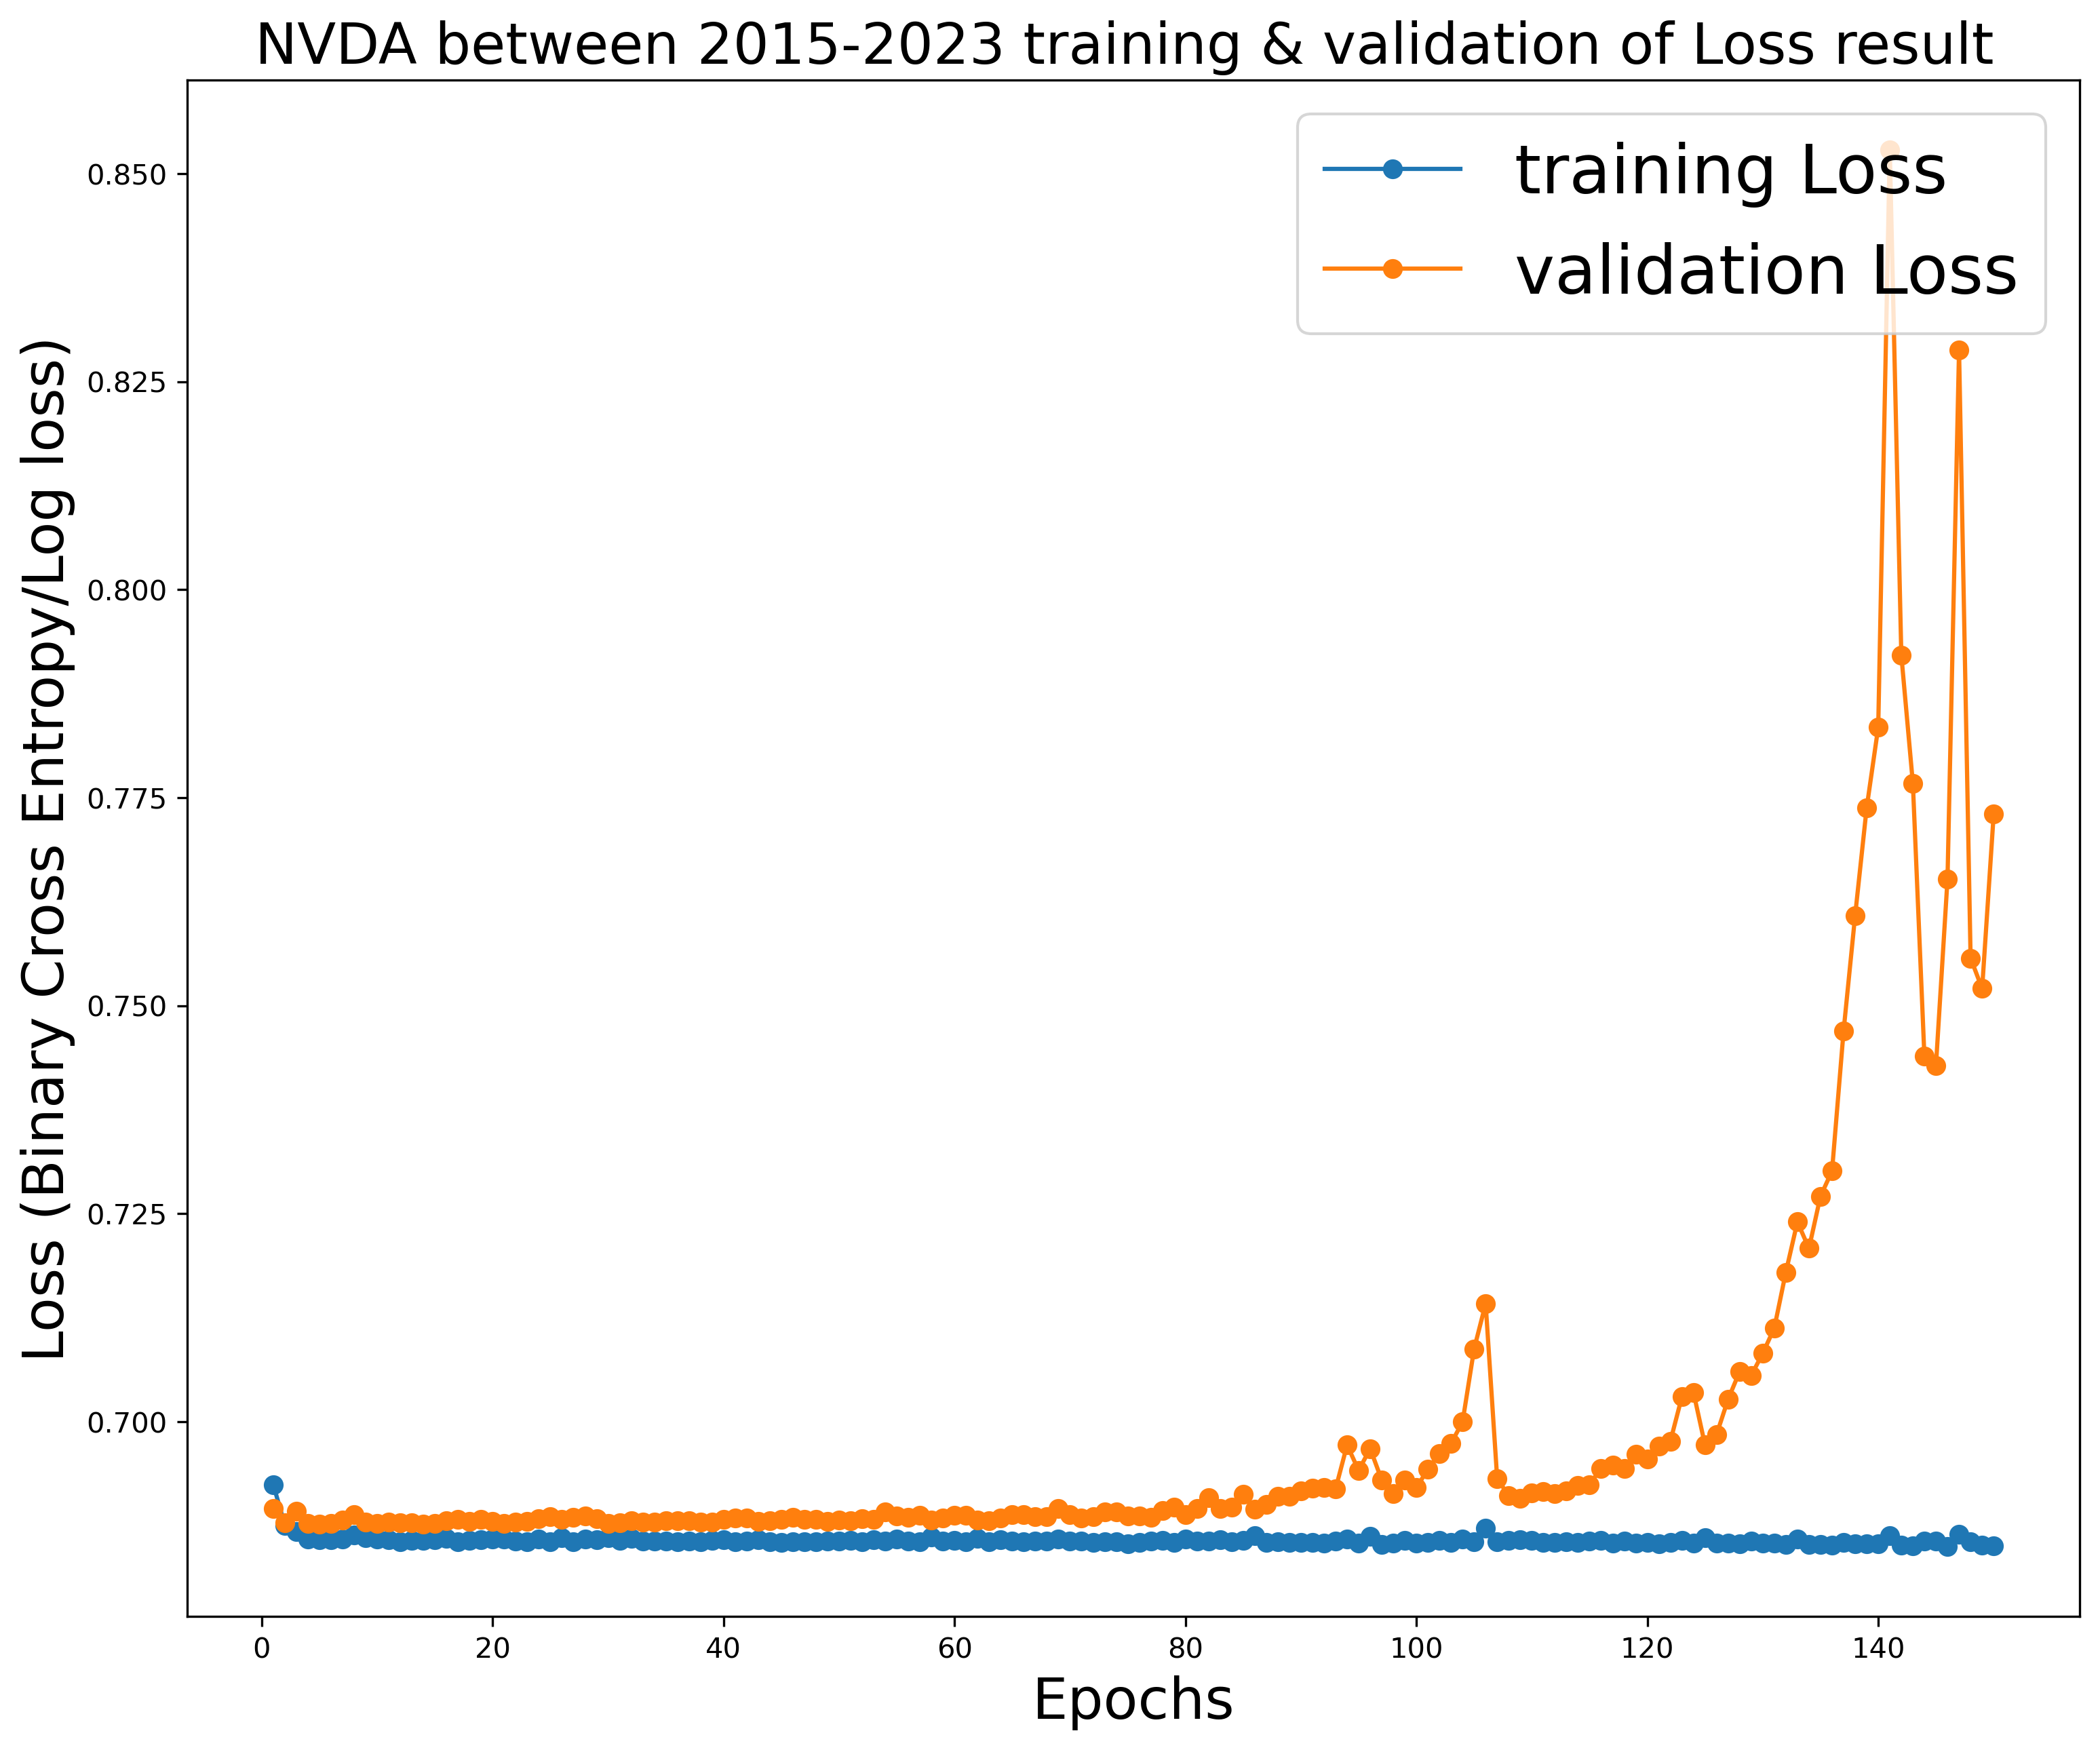

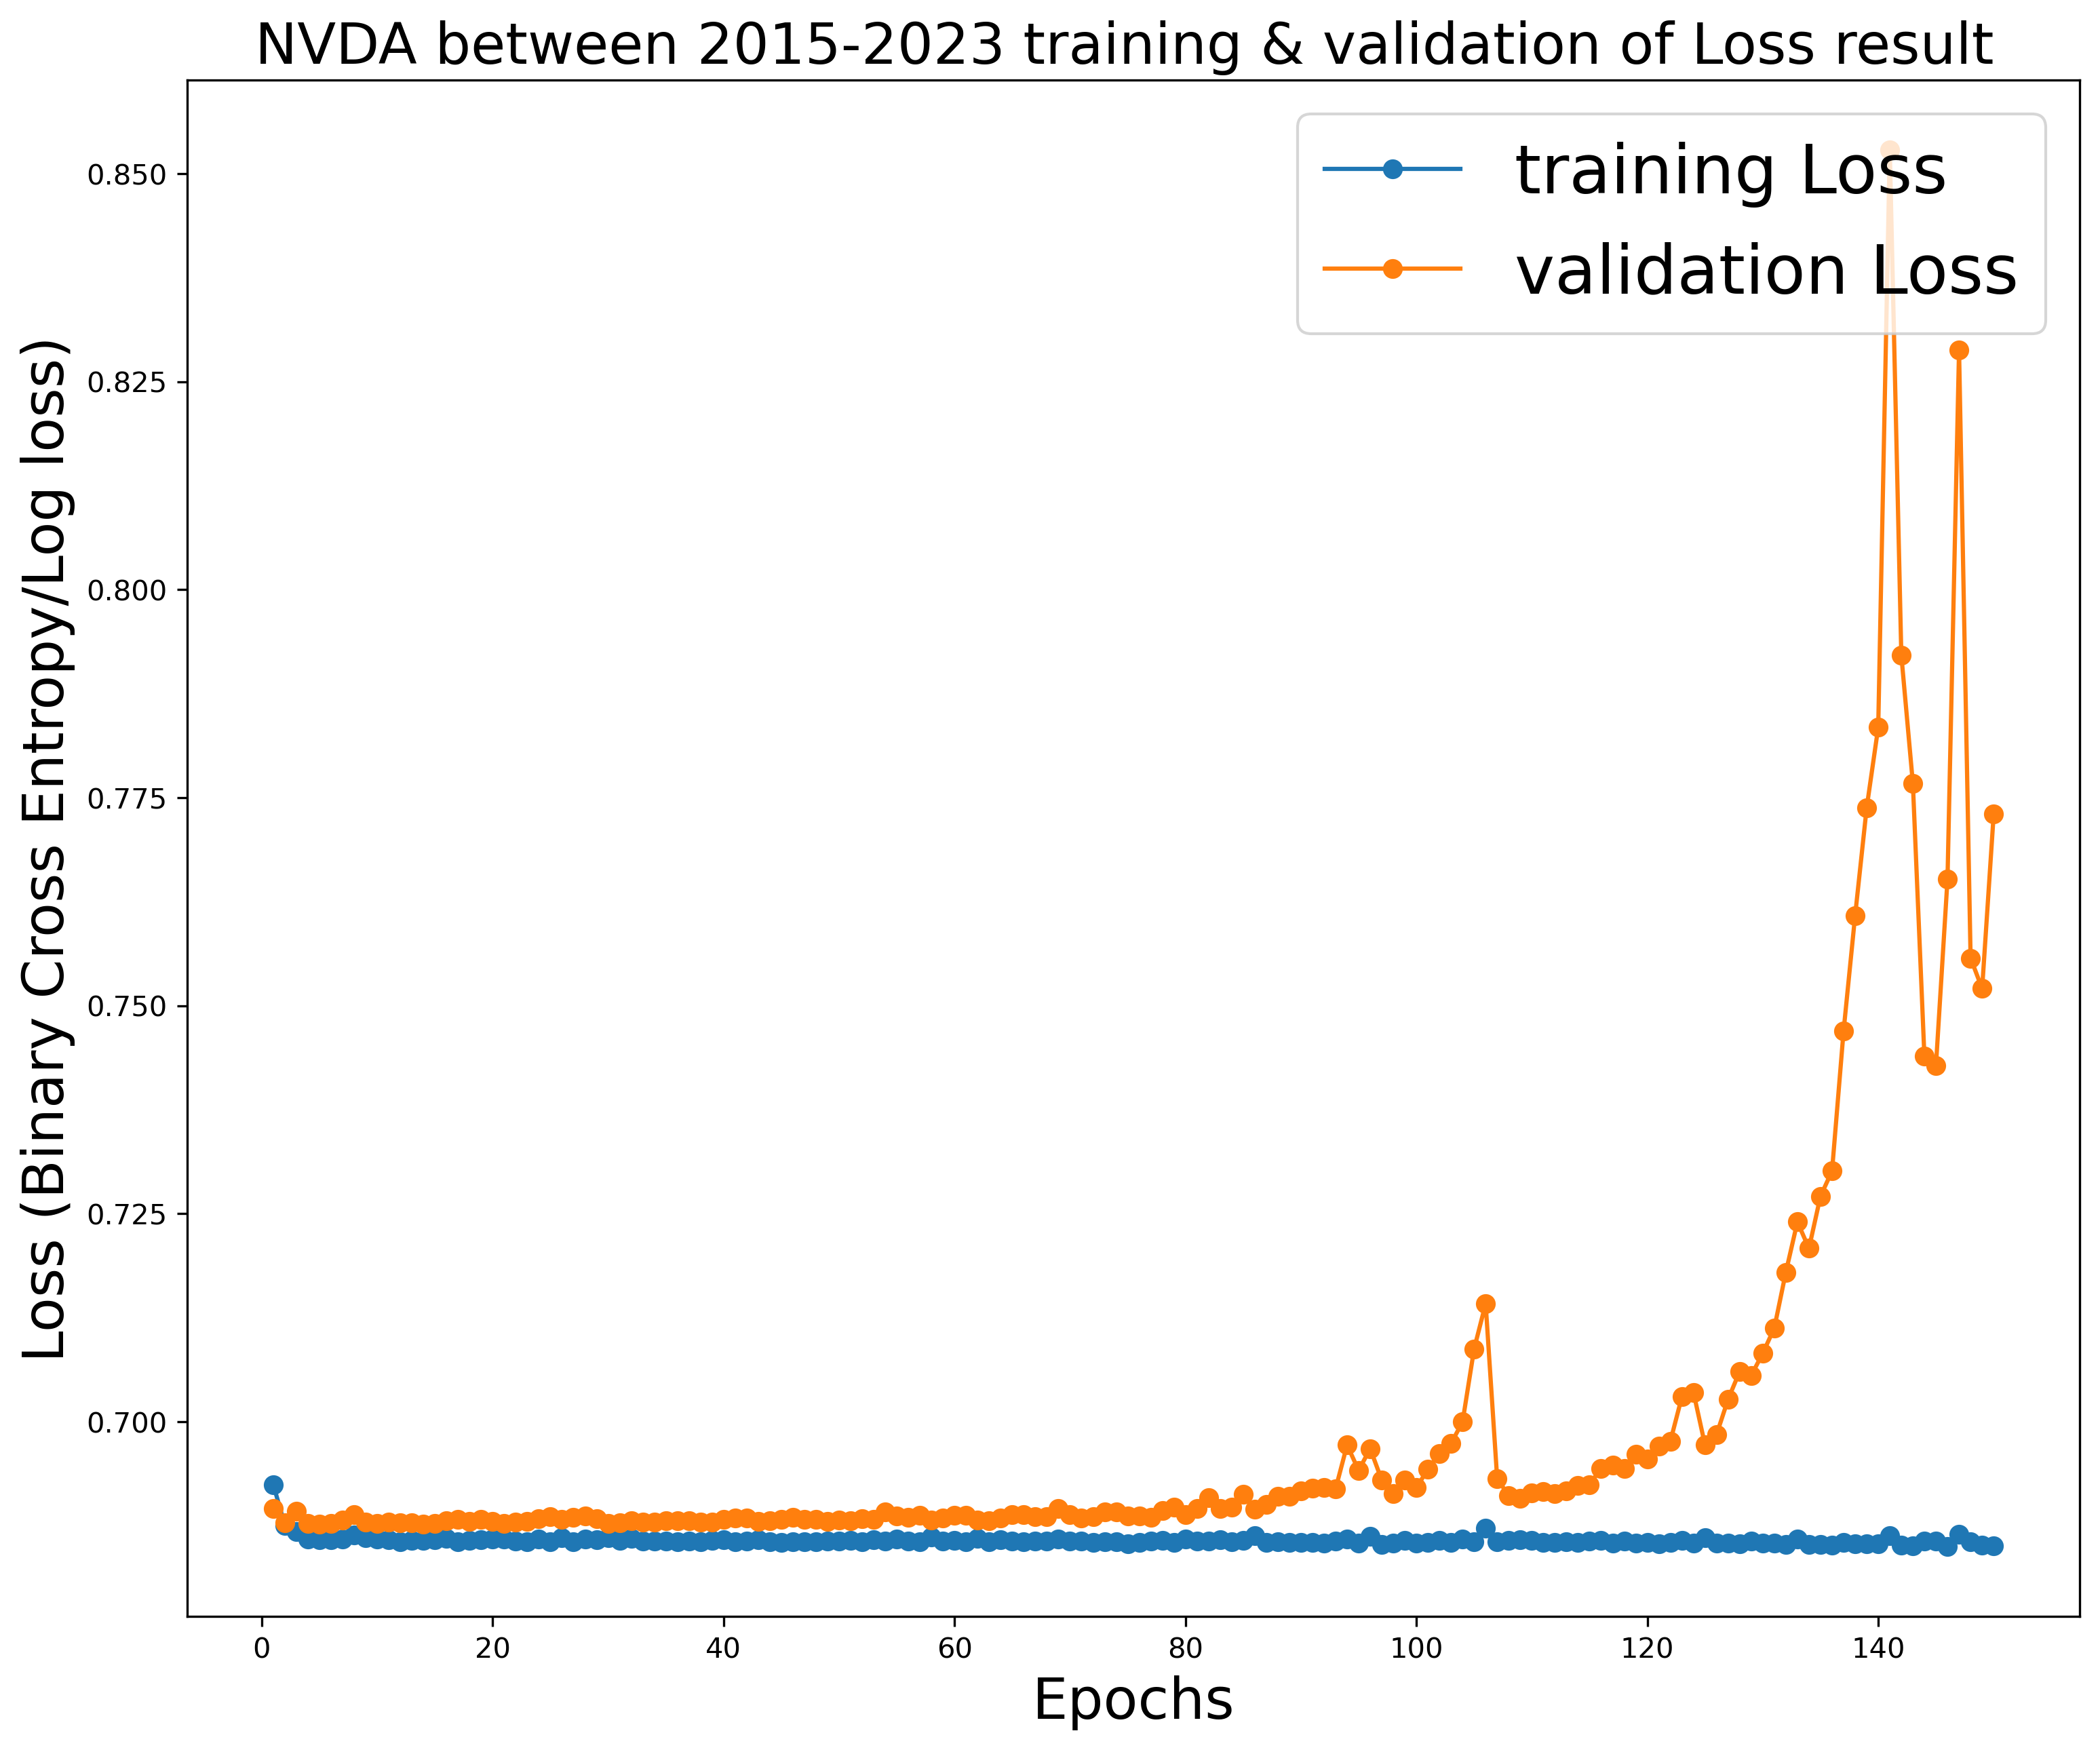

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Binary Cross Entropy/Log loss)',fontsize=20)
plt.title('NVDA between 2015-2023 training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

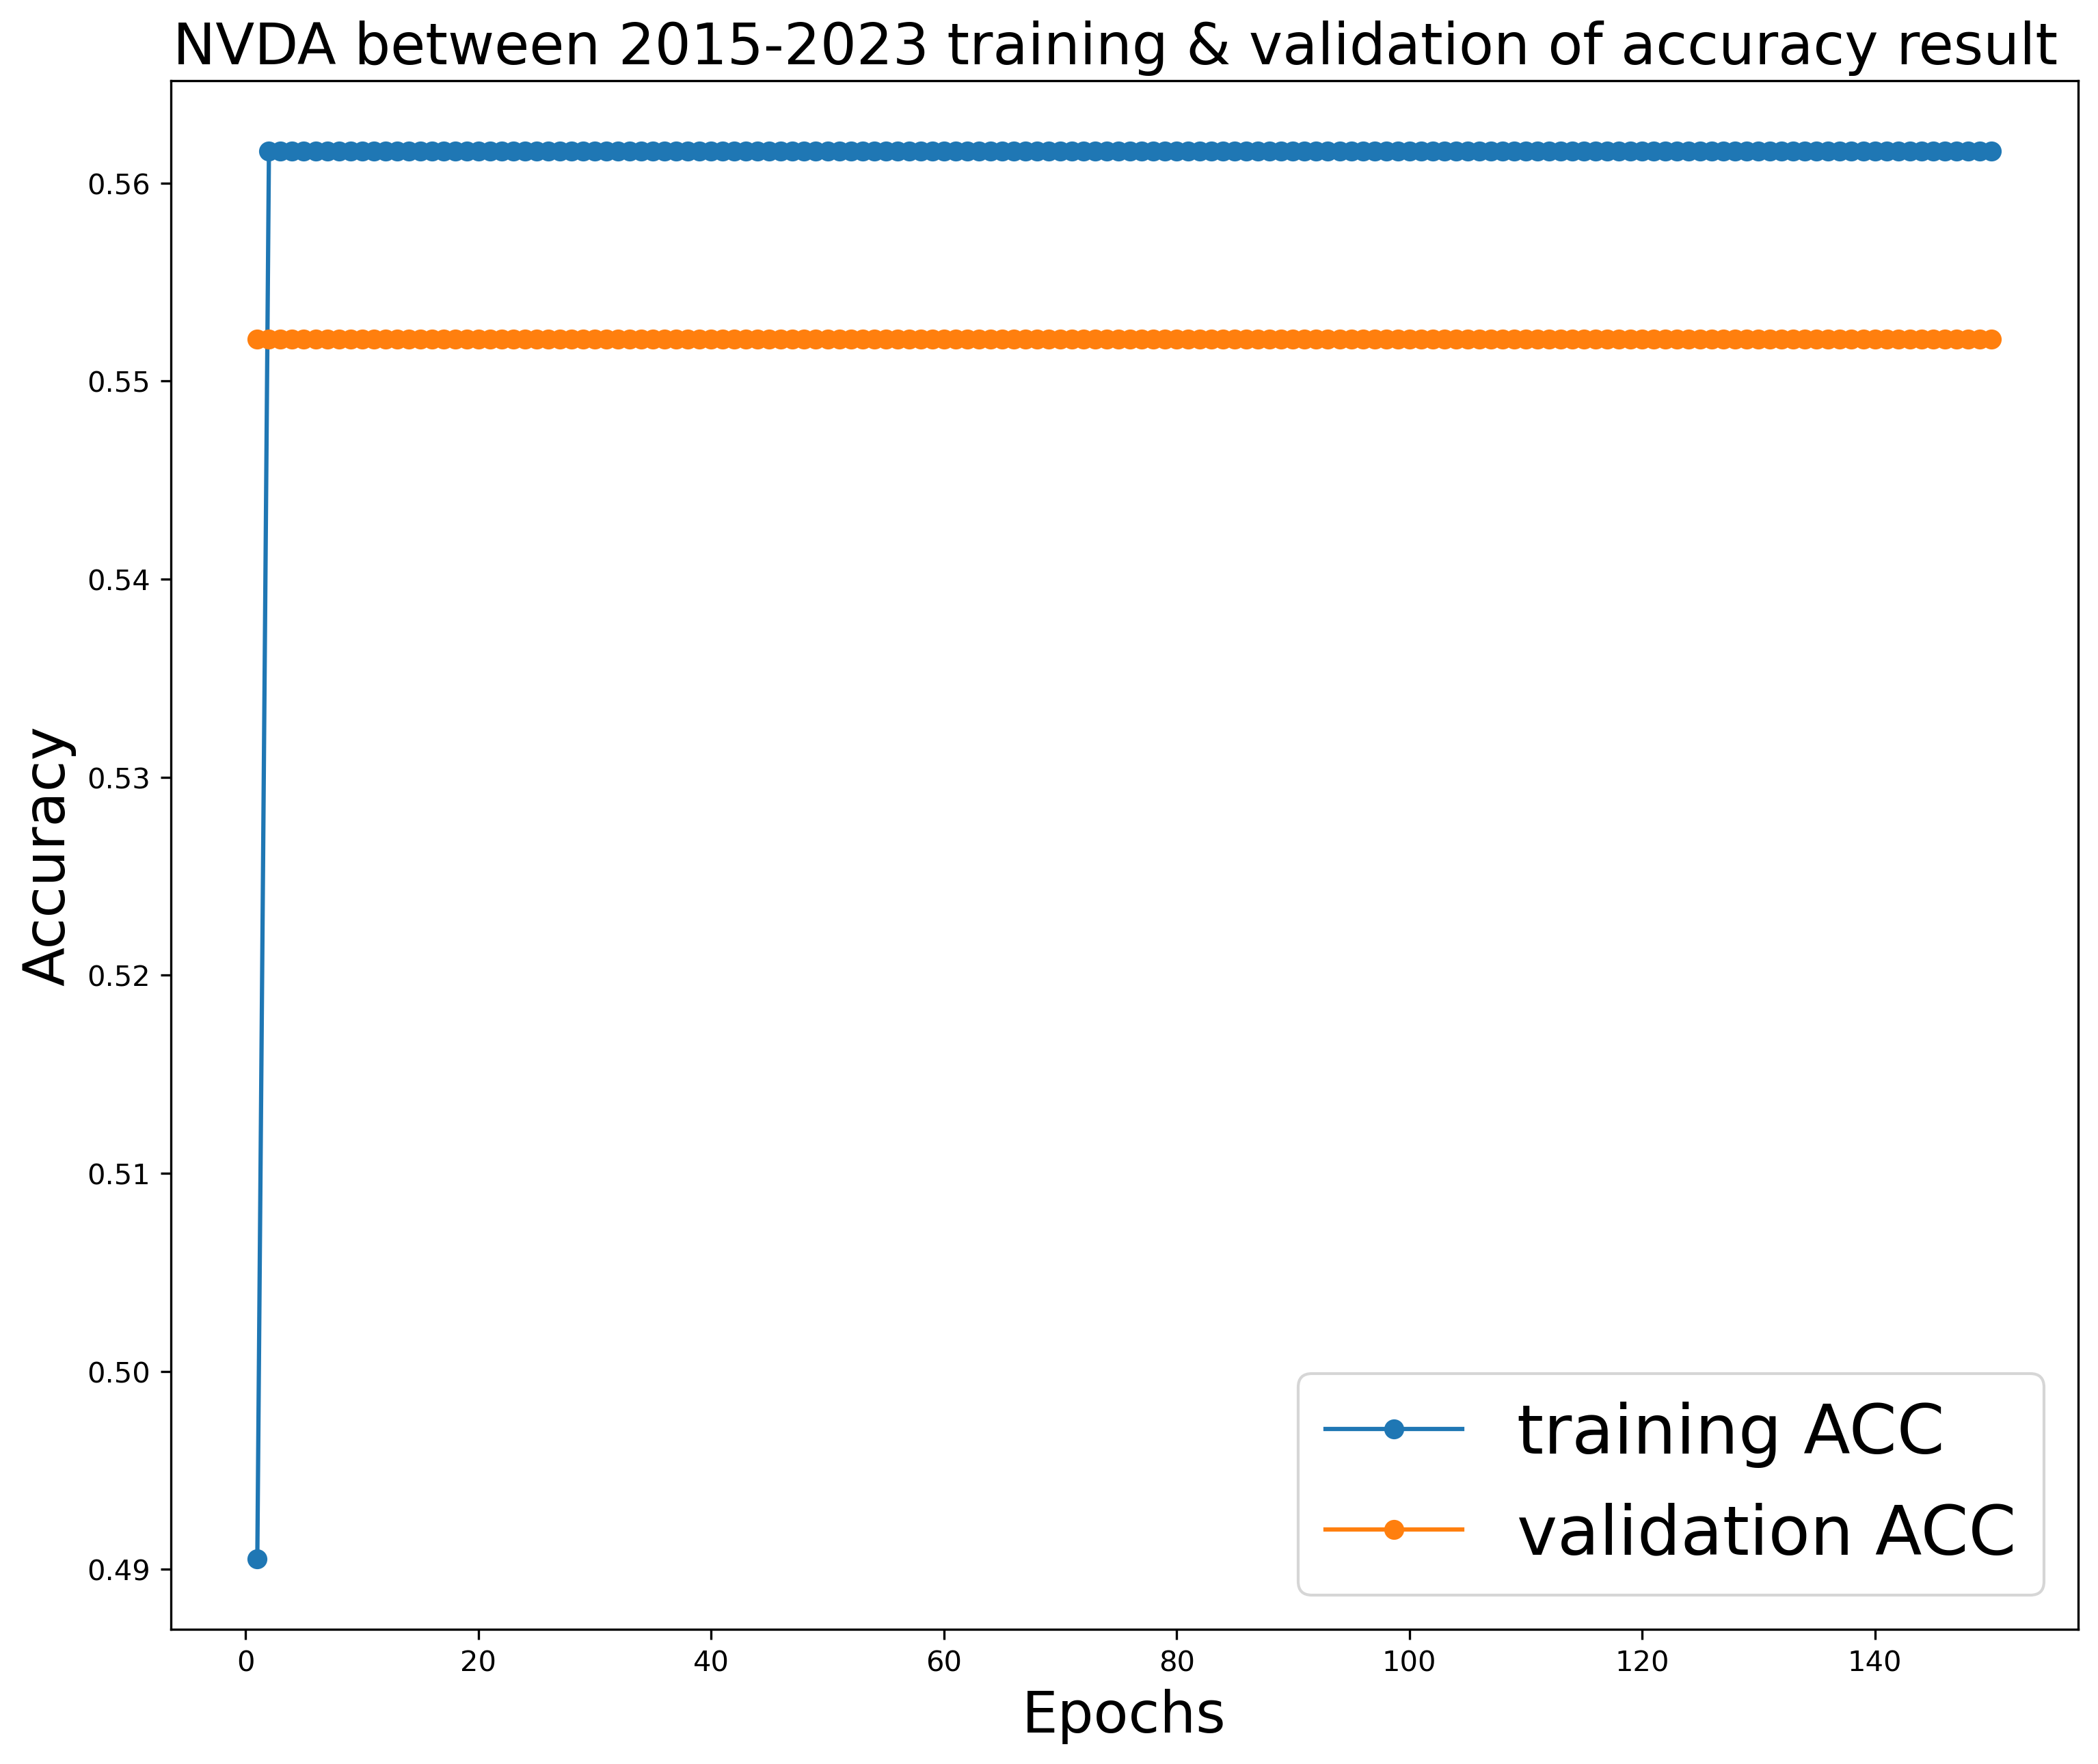

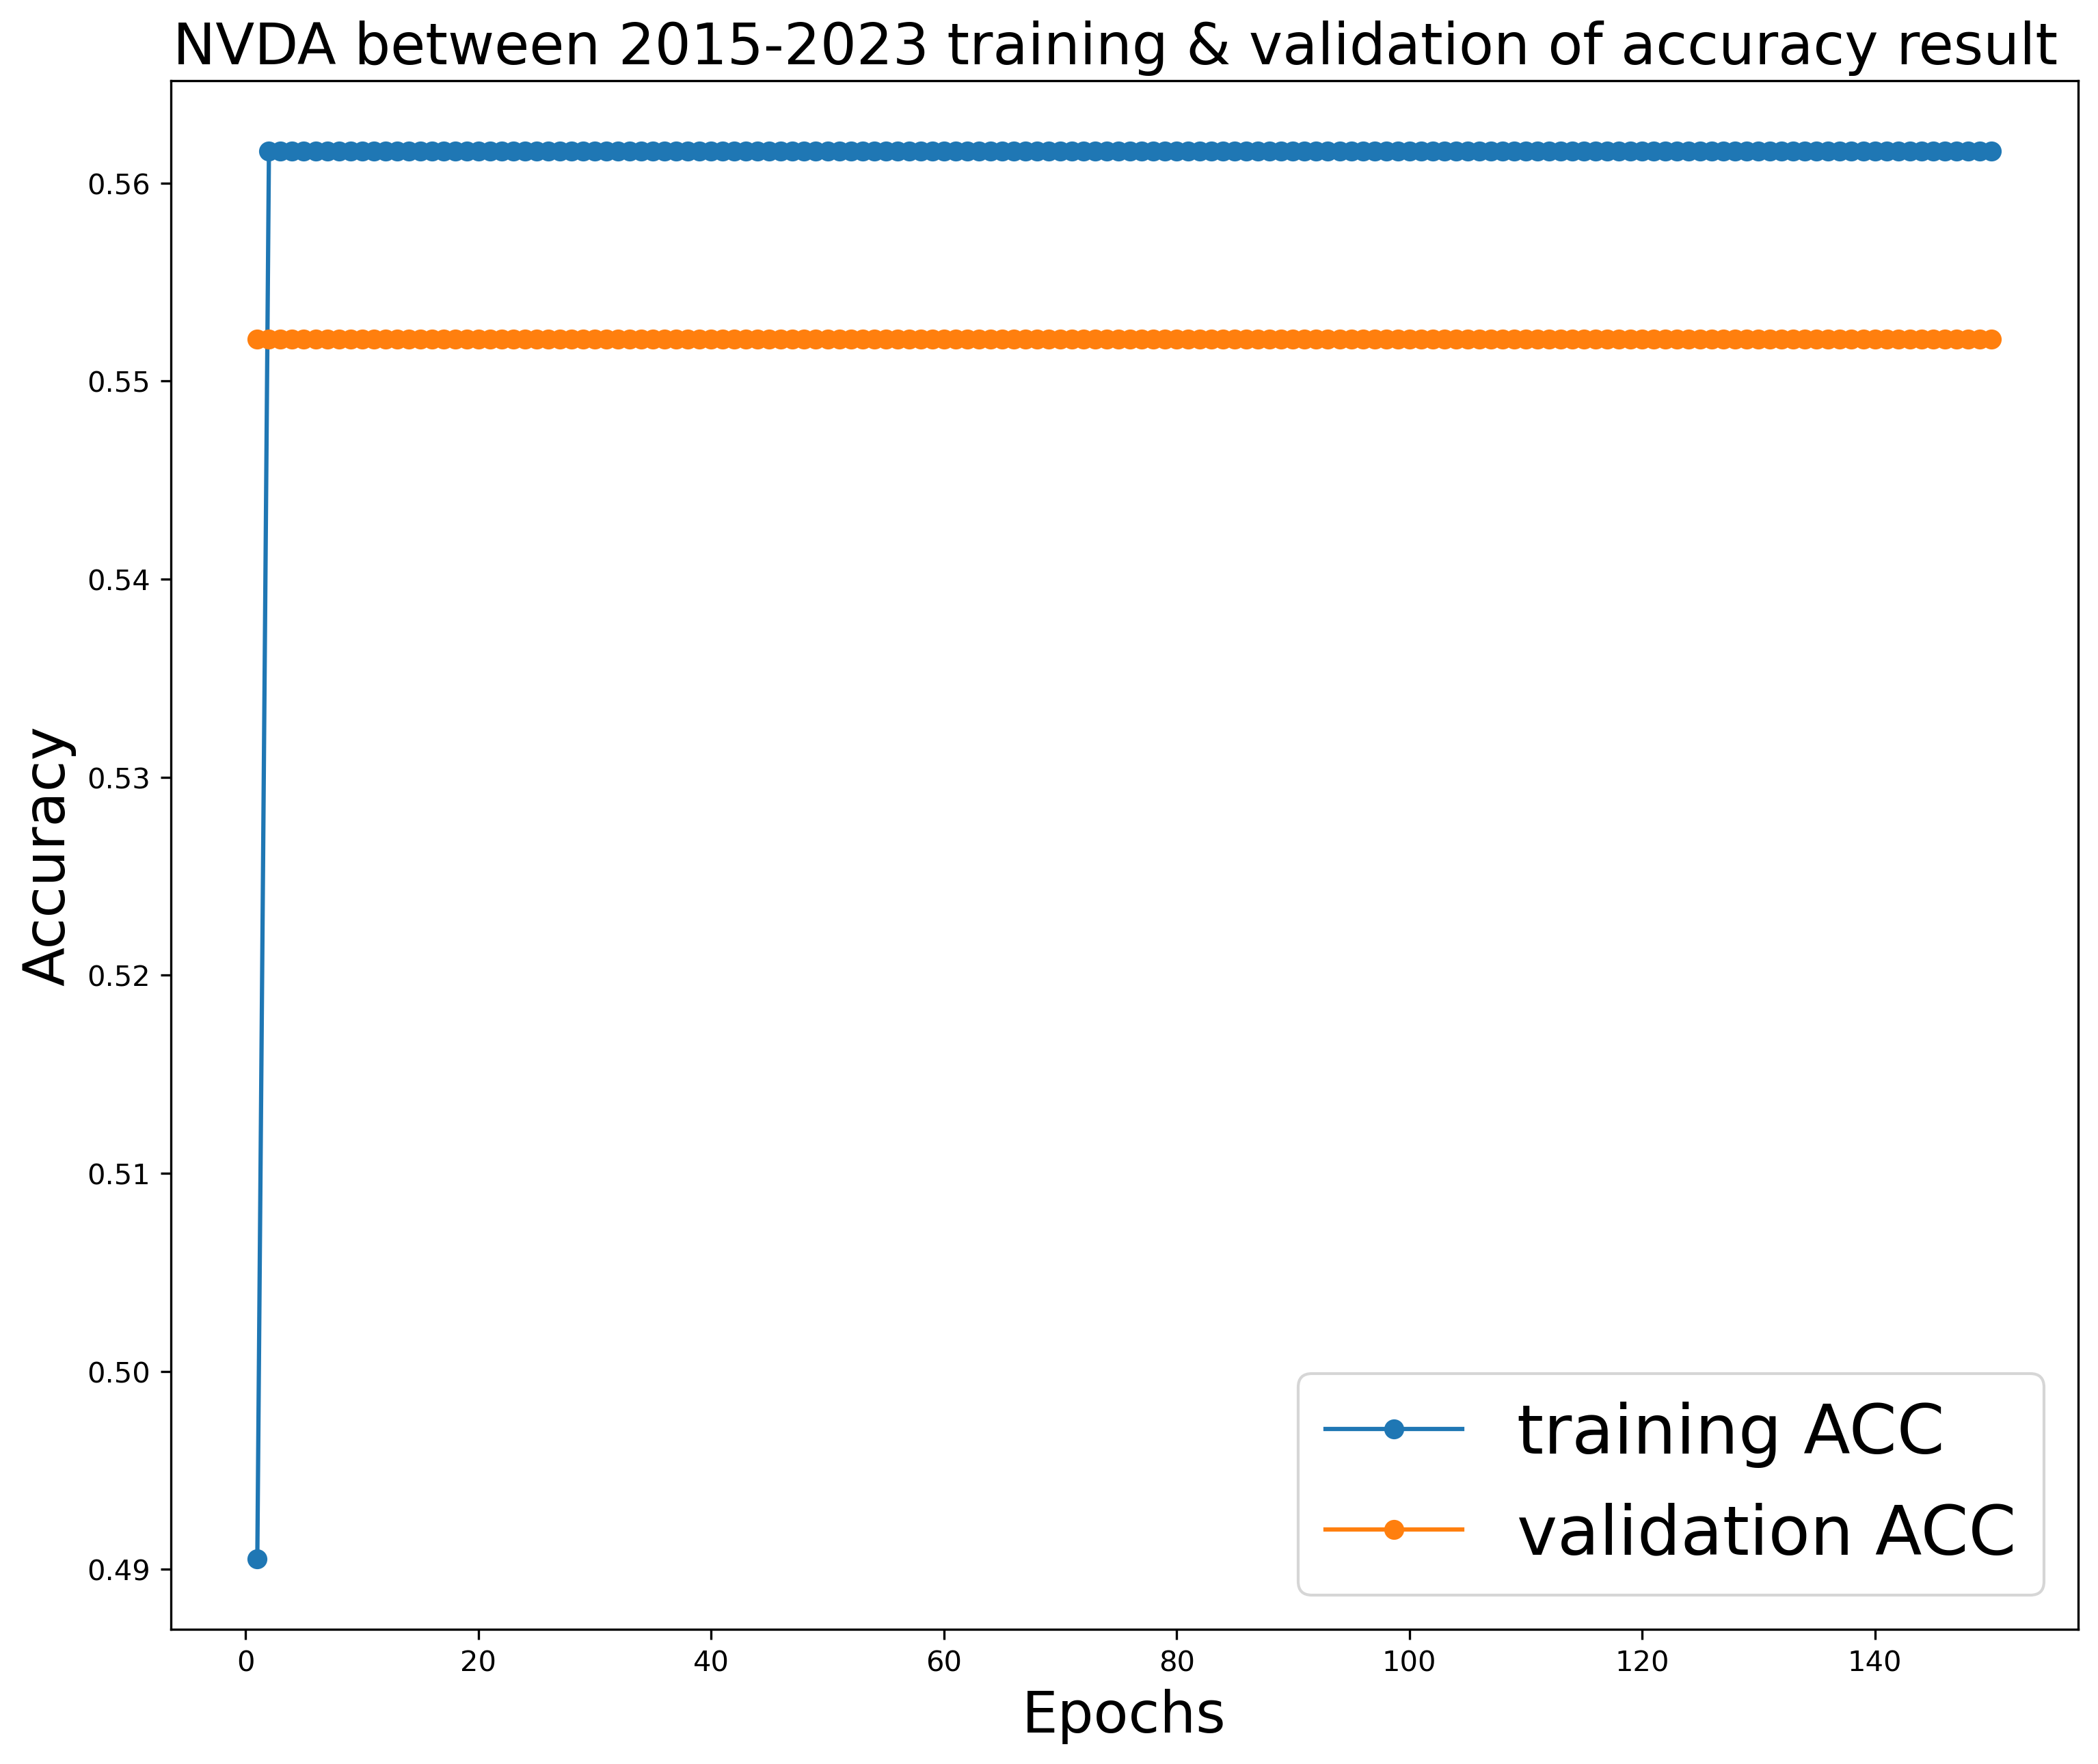

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('NVDA between 2015-2023 training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [ ]:
# 7.3 Save the trained model
#model.save('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
# Colab
model.save('D:/user/Desktop/CL_LSTM_trained_model.h5')
print('Model has been saved...')

Model has been saved...
Model has been saved...


In [ ]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
# Colab
model=keras.models.load_model('D:/user/Desktop/CL_LSTM_trained_model.h5')
print('Model successfully loaded...')

Model successfully loaded...
Model successfully loaded...


# 8. Testing

In [ ]:
# 8.1 Make prediction
prediction=model.predict_on_batch(x[1688:])
prediction

array([[1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

array([[1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

Note: The prediction generate by ANN are values between 0 and 1, so a transformation is required before calculating the metrics and confusion matrix

In [ ]:
# 8.2 Transform the predictions to 0 and 1
testing_prediction=(model.predict_on_batch(x[1688:]) >= 0.5).astype('int')
testing_prediction

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y[1688:],testing_prediction)
testing_f1s=f1_score(y[1688:],testing_prediction,pos_label=1)
testing_pre=precision_score(y[1688:],testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y[1688:],testing_prediction,pos_label=1)
testing_spe=specificity_score(y[1688:],testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y[1688:],testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 51.64
Testing f1s: 68.11
Testing pre: 51.64
Testing sen: 100.0
Testing spe: 0.0

Testing confusion matrix:
[[  0 206]
 [  0 220]]
Testing result:
Testing ACC: 51.64
Testing f1s: 68.11
Testing pre: 51.64
Testing sen: 100.0
Testing spe: 0.0

Testing confusion matrix:
[[  0 206]
 [  0 220]]


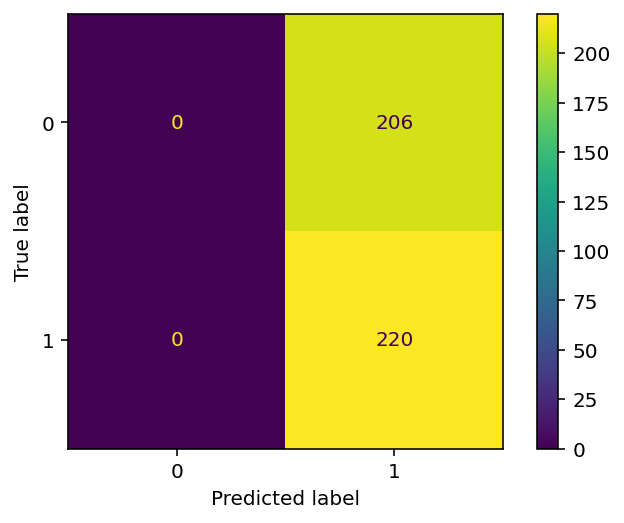

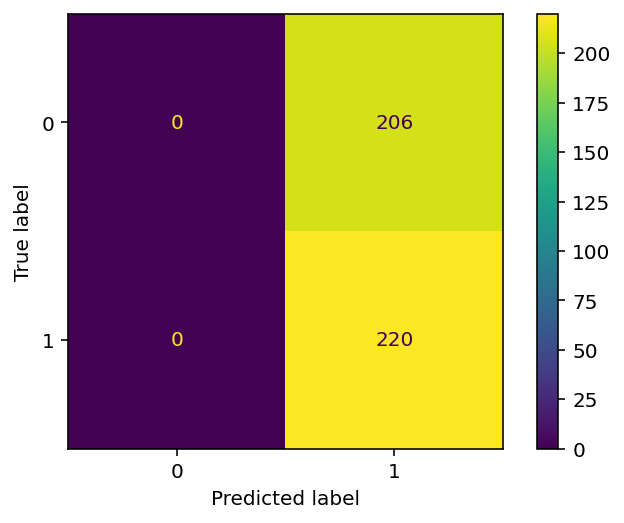

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
%config InlineBackend.figure_format='retina'
ConfusionMatrixDisplay(testing_cm,display_labels=["0","1"]).plot()

14/14 [==============================] - 0s 2ms/step


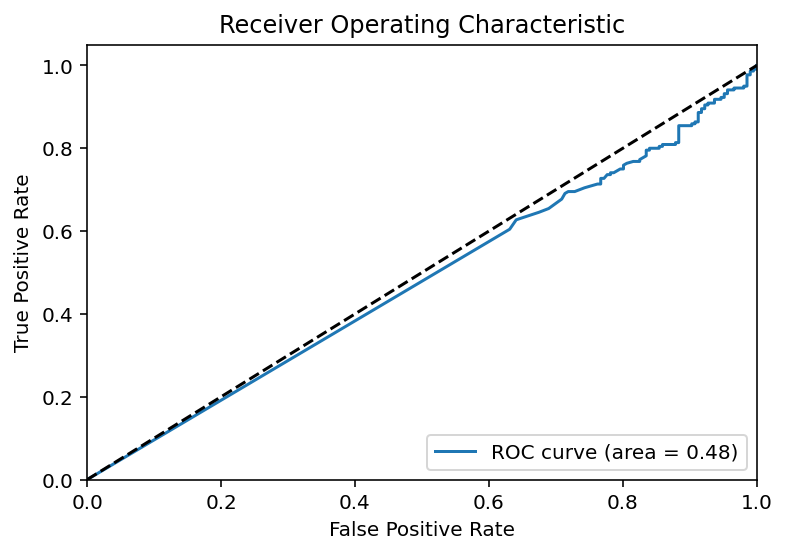

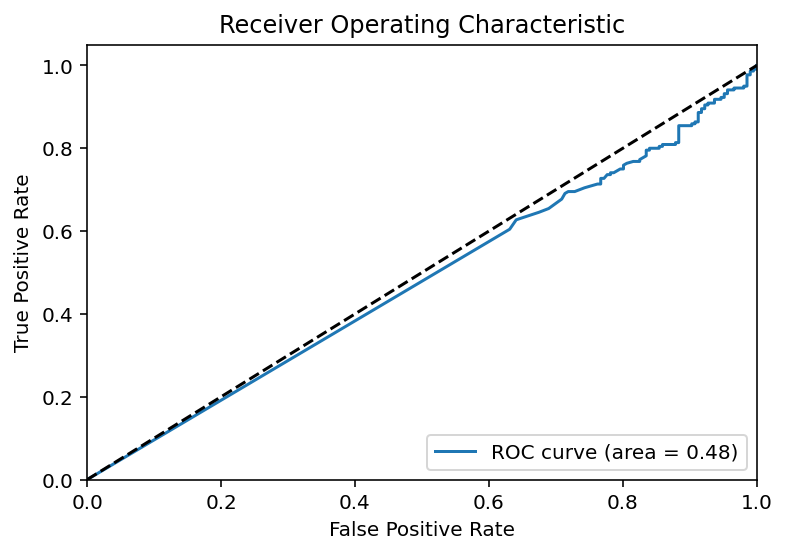

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%config InlineBackend.figure_format='retina'

# 預測機率
y_scores = model.predict(x[1688:])

# 計算假陽性率（FPR）、真陽性率（TPR）和閾值（thresholds）
fpr, tpr, thresholds = roc_curve(y[1688:], y_scores)

# 計算AUC
roc_auc = auc(fpr, tpr)

# 繪製ROC曲線
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
